___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

Data vocabulary:

1. #3 (age): age in years 
2. #4 (sex): sex (1 = male; 0 = female) 
3. #9 (cp): cp: chest pain type | Value 0: typical angina | Value 1: atypical angina | Value 2: non-anginal pain | Value 3: asymptomatic 
4. #10 (trestbps): resting blood pressure (in mm Hg on admission to the hospital) 
5. #12 (chol): serum cholestoral in mg/dl 
6. #16 (fbs): (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
7. #19 (restecg): resting electrocardiographic results | Value 0: normal | Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) | Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
8. #32 (thalach): maximum heart rate achieved 
9. #38 (exang): exercise induced angina (1 = yes; 0 = no) 
10. #40 (oldpeak): ST depression induced by exercise relative to rest 
11. #41 (slope): the slope of the peak exercise ST segment | Value 1: upsloping | Value 2: flat | Value 3: downsloping 
12. #44 (ca): number of major vessels (0-3) colored by flourosopy 
13. #51 (thal): 3 = normal; 6 = fixed defect; 7 = reversable defect 
14. #58 (num) (the predicted attribute): Value 0: < 50% diameter narrowing | Value 1: > 50% diameter narrowing 


* https://archive.ics.uci.edu/ml/datasets/heart+disease

# Import esential Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler
from sklearn.model_selection import KFold, cross_val_predict, train_test_split,GridSearchCV,cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR


import warnings
warnings.filterwarnings('ignore')

plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('max_colwidth',200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.4f' % x)

# Ingest the data to notebook

In [3]:
data = pd.read_csv("heart.csv")
df = data.copy()

# EDA

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3000,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5000,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4000,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8000,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6000,2,0,2,1


In [5]:
df.columns


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [6]:
df.shape


(303, 14)

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
age,303.0000,54.3663,9.0821,29.0000,47.5000,55.0000,61.0000,77.0000
sex,303.0000,0.6832,0.4660,0.0000,0.0000,1.0000,1.0000,1.0000
cp,303.0000,0.9670,1.0321,0.0000,0.0000,1.0000,2.0000,3.0000
trestbps,303.0000,131.6238,17.5381,94.0000,120.0000,130.0000,140.0000,200.0000
chol,303.0000,246.2640,51.8308,126.0000,211.0000,240.0000,274.5000,564.0000
fbs,303.0000,0.1485,0.3562,0.0000,0.0000,0.0000,0.0000,1.0000
restecg,303.0000,0.5281,0.5259,0.0000,0.0000,1.0000,1.0000,2.0000
thalach,303.0000,149.6469,22.9052,71.0000,133.5000,153.0000,166.0000,202.0000
exang,303.0000,0.3267,0.4698,0.0000,0.0000,0.0000,1.0000,1.0000
oldpeak,303.0000,1.0396,1.1611,0.0000,0.0000,0.8000,1.6000,6.2000


In [9]:
df.nunique()


age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [10]:
df.duplicated().value_counts()


False    302
True       1
dtype: int64

In [11]:
df[df.duplicated() == True]


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0000,2,4,2,1


In [12]:
df.drop_duplicates(inplace=True)


In [13]:
df.shape


(302, 14)

Checking missing Values

In [19]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Correlation

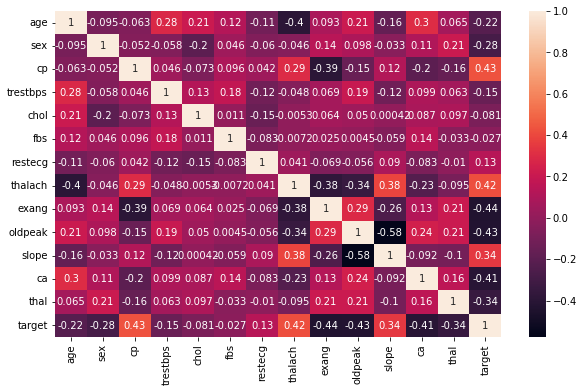

In [20]:
sns.heatmap(df.corr(), annot=True);


In [21]:
df['target'].describe()


count   302.0000
mean      0.5430
std       0.4990
min       0.0000
25%       0.0000
50%       1.0000
75%       1.0000
max       1.0000
Name: target, dtype: float64

In [22]:
print( f"Skewness: {df['target'].skew()}")


Skewness: -0.17369101189529737


In [42]:
numerical_columns= df.drop(['target'], axis=1).select_dtypes('number').columns


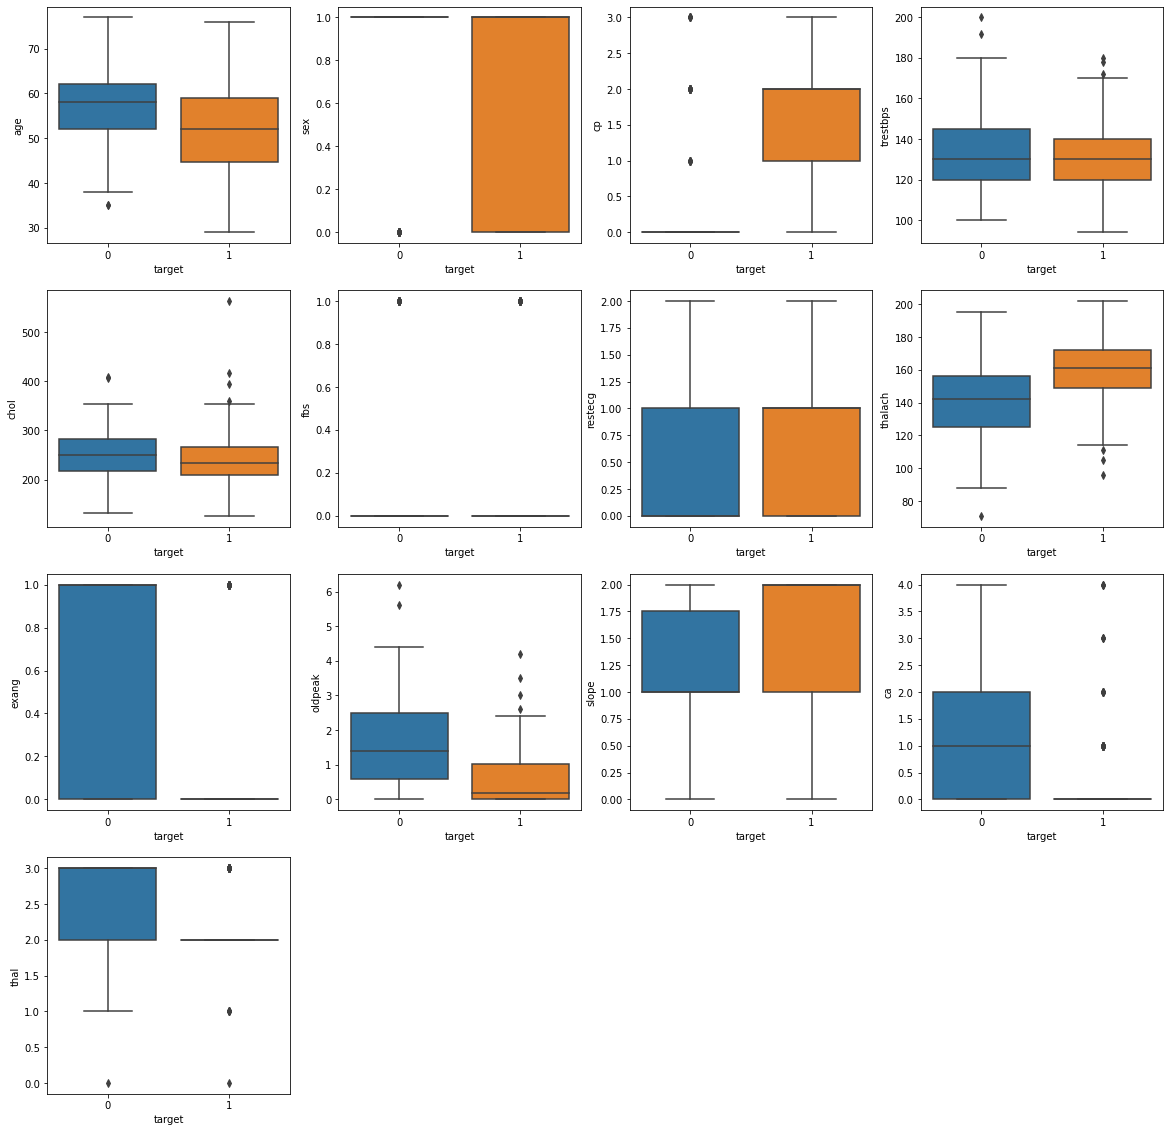

In [45]:
plt.figure(figsize=(20,20))
for i,num in enumerate(numerical_columns):
    if num != "target":
        plt.subplot(4,4,i+1)
        sns.boxplot(x='target',y=num,data=df)

<AxesSubplot:>

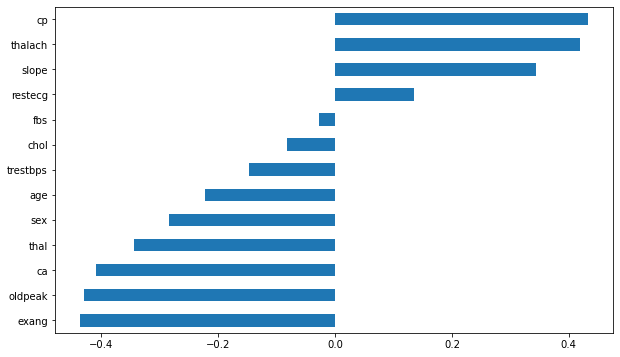

In [174]:
df.corr()["target"].drop("target").sort_values().plot.barh()

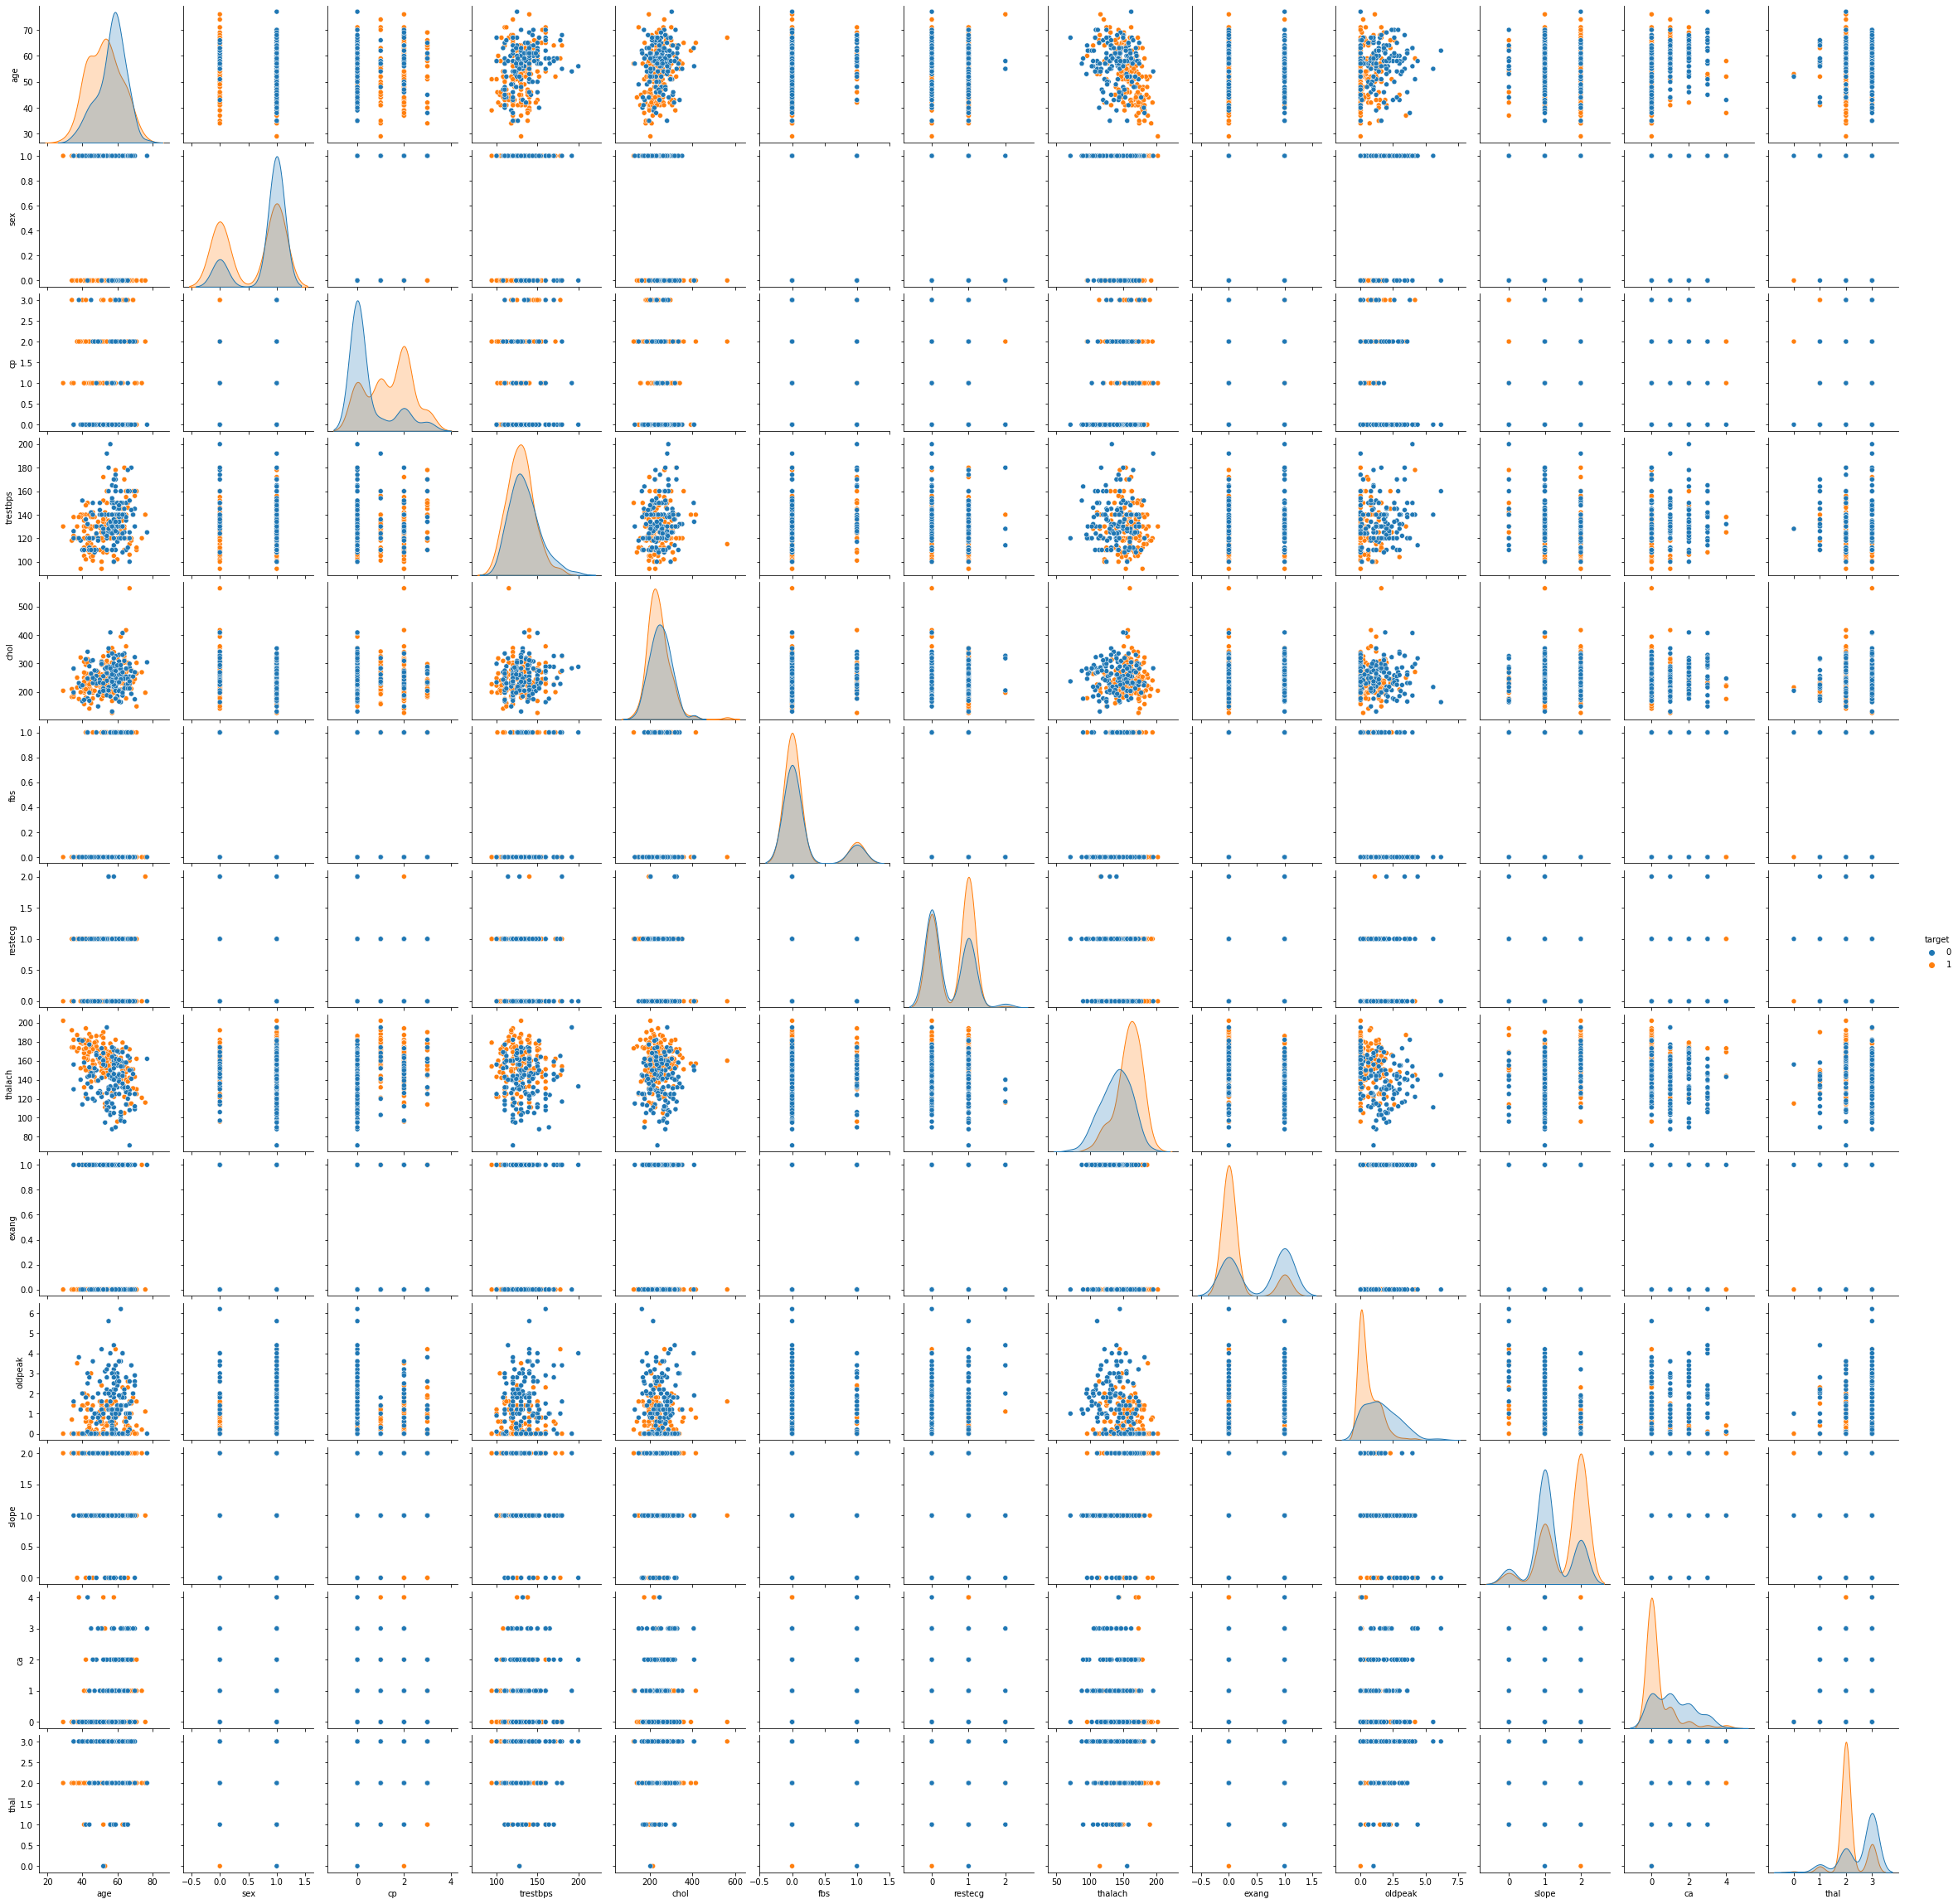

In [175]:
sns.pairplot(df, hue = "target")

# Data Preprocessing

In [46]:
X = df.drop("target", axis=1)
y = df["target"]

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)


In [83]:
print("X_train shape",X_train.shape)
print("y_train shape",y_train.shape)
print("X_test shape",X_test.shape)
print("y_test shape",y_test.shape)

X_train shape (241, 13)
y_train shape (241,)
X_test shape (61, 13)
y_test shape (61,)


In [84]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()



In [85]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Implement Logistic Regression and Evaluate

In [86]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()


In [87]:
log_model.fit(X_train_scaled, y_train)


LogisticRegression()

In [93]:
y_test_pred=log_model.predict(X_test_scaled)
y_test_pred


array([1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1])

In [89]:
y_test_pred_proba = log_model.predict_proba(X_test_scaled)
y_test_pred_proba


array([[0.12089027, 0.87910973],
       [0.18188362, 0.81811638],
       [0.32179868, 0.67820132],
       [0.05366531, 0.94633469],
       [0.94594524, 0.05405476],
       [0.17706164, 0.82293836],
       [0.12435304, 0.87564696],
       [0.94570646, 0.05429354],
       [0.78615868, 0.21384132],
       [0.23836821, 0.76163179],
       [0.67749556, 0.32250444],
       [0.31550012, 0.68449988],
       [0.28876871, 0.71123129],
       [0.66520238, 0.33479762],
       [0.08995066, 0.91004934],
       [0.27498323, 0.72501677],
       [0.03619084, 0.96380916],
       [0.34091652, 0.65908348],
       [0.27777148, 0.72222852],
       [0.92061063, 0.07938937],
       [0.91871181, 0.08128819],
       [0.79466969, 0.20533031],
       [0.42639799, 0.57360201],
       [0.7614557 , 0.2385443 ],
       [0.88429982, 0.11570018],
       [0.07969944, 0.92030056],
       [0.94385909, 0.05614091],
       [0.2022253 , 0.7977747 ],
       [0.92981746, 0.07018254],
       [0.12372234, 0.87627766],
       [0.

In [102]:

test_data = pd.DataFrame(y_test)
test_data["pred"] = y_test_pred
test_data["prob"] = y_test_pred_proba[:,1]



In [103]:
test_data

,target,pred,prob
162,1,1,0.8791
8,1,1,0.8181
89,1,1,0.6782
154,1,1,0.9463
201,0,0,0.0541
12,1,1,0.8229
65,1,1,0.8756
187,0,0,0.0543
247,0,0,0.2138
117,1,1,0.7616


In [105]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

[[22  8]
 [ 1 30]]
              precision    recall  f1-score   support

           0       0.96      0.73      0.83        30
           1       0.79      0.97      0.87        31

    accuracy                           0.85        61
   macro avg       0.87      0.85      0.85        61
weighted avg       0.87      0.85      0.85        61



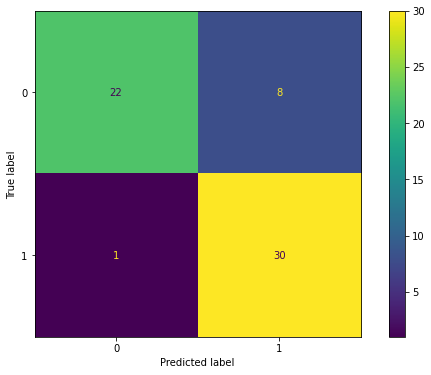

In [106]:
plot_confusion_matrix(log_model, X_test_scaled, y_test);


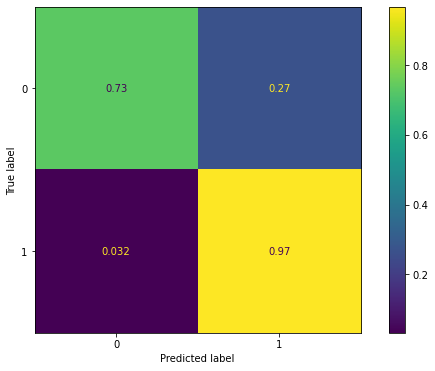

In [107]:
plot_confusion_matrix(log_model, X_test_scaled, y_test, normalize='true');


In [ ]:
#Cross Validation

In [108]:
from sklearn.model_selection import cross_validate
model = LogisticRegression()


In [110]:
results = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision','recall','f1'], cv = 10)
results

{'fit_time': array([0.00995374, 0.00512314, 0.00880599, 0.0067091 , 0.00521994,
        0.00904489, 0.00578094, 0.00636482, 0.00584292, 0.00583291]),
 'score_time': array([0.00423002, 0.00300884, 0.00319505, 0.00332212, 0.00230408,
        0.00343394, 0.00358701, 0.00250435, 0.00342774, 0.00287104]),
 'test_accuracy': array([0.88      , 0.75      , 0.79166667, 0.79166667, 0.70833333,
        0.79166667, 0.75      , 0.83333333, 0.875     , 1.        ]),
 'test_precision': array([0.86666667, 0.78571429, 0.76470588, 0.75      , 0.71428571,
        0.83333333, 0.73333333, 0.84615385, 0.85714286, 1.        ]),
 'test_recall': array([0.92857143, 0.78571429, 0.92857143, 0.92307692, 0.76923077,
        0.76923077, 0.84615385, 0.84615385, 0.92307692, 1.        ]),
 'test_f1': array([0.89655172, 0.78571429, 0.83870968, 0.82758621, 0.74074074,
        0.8       , 0.78571429, 0.84615385, 0.88888889, 1.        ])}

In [112]:
df_results = pd.DataFrame(results)
df_results.head()

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
0,0.0100,0.0042,0.8800,0.8667,0.9286,0.8966
1,0.0051,0.0030,0.7500,0.7857,0.7857,0.7857
2,0.0088,0.0032,0.7917,0.7647,0.9286,0.8387
3,0.0067,0.0033,0.7917,0.7500,0.9231,0.8276
4,0.0052,0.0023,0.7083,0.7143,0.7692,0.7407


In [113]:
df_results.mean()

fit_time         0.0069
score_time       0.0032
test_accuracy    0.8172
test_precision   0.8151
test_recall      0.8720
test_f1          0.8410
dtype: float64

In [183]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [176]:
penalty = ["l1", "l2", "elasticnet"]
l1_ratio = np.linspace(0, 1, 20)
C = np.logspace(-1, 5, 20)
class_weight= ["balanced", None] 
solver =["lbfgs","liblinear","sag","saga"]

param_grid = {"penalty" : penalty,
              "C" : C,
              "class_weight":class_weight,
              "solver":solver}


In [177]:
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          cv=10,
                          scoring = "recall",   #f1_0 = make_scorer(f1_score, pos_label =0)
                          n_jobs = -1)

In [179]:
grid_model.fit(X_train_scaled,y_train)


/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:35

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'sag', 'saga']},
             scoring='recall')

In [180]:
grid_model.best_params_


{'C': 0.1, 'class_weight': None, 'penalty': 'l2', 'solver': 'lbfgs'}

In [181]:
y_test_pred = grid_model.predict(X_test_scaled)
y_test_pred

array([1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1])

In [184]:
eval_metric(grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[21  9]
 [ 2 29]]
              precision    recall  f1-score   support

           0       0.91      0.70      0.79        30
           1       0.76      0.94      0.84        31

    accuracy                           0.82        61
   macro avg       0.84      0.82      0.82        61
weighted avg       0.84      0.82      0.82        61


Train_Set
[[ 77  31]
 [ 12 121]]
              precision    recall  f1-score   support

           0       0.87      0.71      0.78       108
           1       0.80      0.91      0.85       133

    accuracy                           0.82       241
   macro avg       0.83      0.81      0.82       241
weighted avg       0.83      0.82      0.82       241



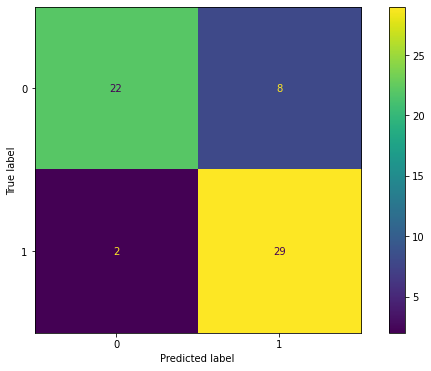

In [172]:
plot_confusion_matrix(grid_model, X_test_scaled, y_test);


In [ ]:
## ROC (Receiver Operating Curve) and AUC (Area Under Curve)

In [185]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve, average_precision_score, precision_recall_curve

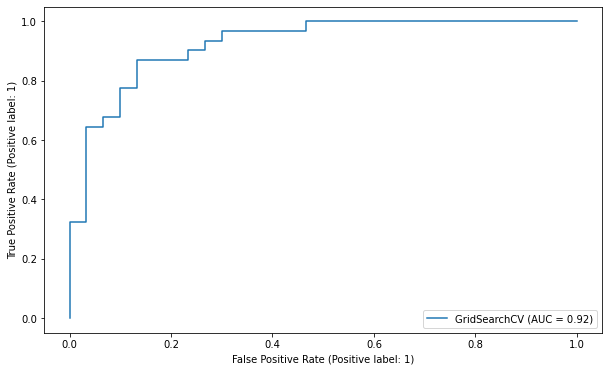

In [186]:
plot_roc_curve(grid_model, X_test_scaled, y_test);

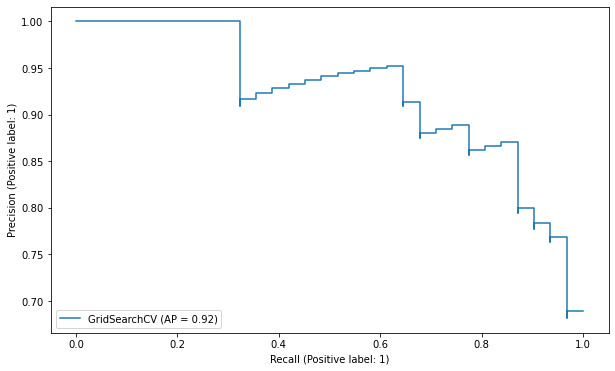

In [187]:
plot_precision_recall_curve(grid_model, X_test_scaled, y_test);

In [ ]:
##Finding best treshold

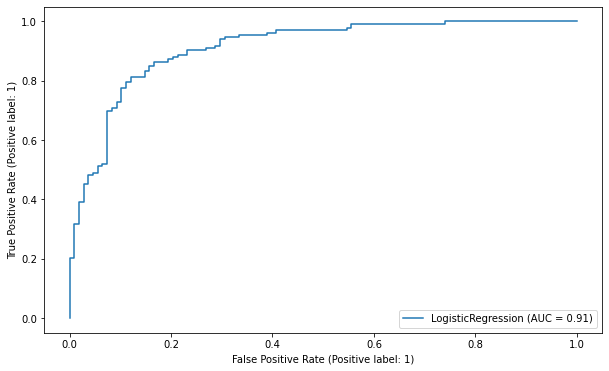

In [188]:
plot_roc_curve(log_model, X_train_scaled, y_train);

In [189]:
y_pred_proba = log_model.predict_proba(X_train_scaled) #
roc_auc_score(y_train, y_pred_proba[:,1])

0.9117237538290169

In [190]:
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_pred_proba[:,1])

In [191]:
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.5832628962766255

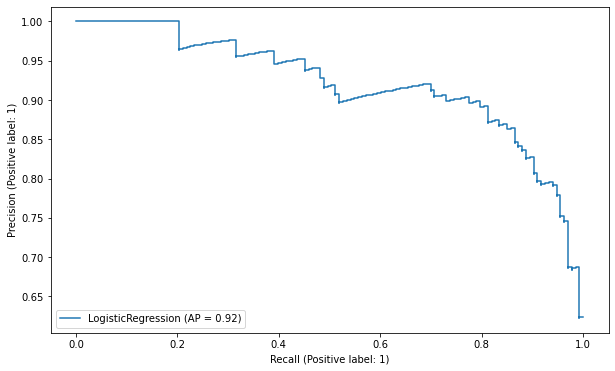

In [192]:
plot_precision_recall_curve(log_model, X_train_scaled, y_train);

In [193]:
y_pred_proba = log_model.predict_proba(X_train_scaled)
average_precision_score(y_train, y_pred_proba[:,1])

0.9209123398465408

In [194]:
precisions, recalls, thresholds = precision_recall_curve(y_train, y_pred_proba[:,1])

In [195]:
optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls))
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.5832628962766255

In [196]:
grid_model.predict_proba(X_test_scaled)[:,1]

array([0.726976  , 0.70584644, 0.62838067, 0.80353541, 0.22493233,
       0.69706007, 0.7514754 , 0.22263953, 0.32268134, 0.67559628,
       0.36654773, 0.64035544, 0.67080526, 0.40114557, 0.79321315,
       0.6325287 , 0.83793092, 0.55332918, 0.63970007, 0.32867784,
       0.25389175, 0.42931398, 0.46527504, 0.36357486, 0.28506953,
       0.77893573, 0.22779366, 0.70051331, 0.23497549, 0.7268548 ,
       0.21373902, 0.51066663, 0.68667369, 0.52695496, 0.7868609 ,
       0.48221456, 0.70979805, 0.6561978 , 0.70273189, 0.76894608,
       0.40706013, 0.70638568, 0.7953332 , 0.62865581, 0.22021457,
       0.60808658, 0.61004973, 0.80450203, 0.85858874, 0.35638614,
       0.23361698, 0.50350822, 0.43444773, 0.30725728, 0.63959243,
       0.41583829, 0.32203824, 0.85484976, 0.76107857, 0.61567805,
       0.73381713])

In [197]:
y_pred2 = pd.Series(grid_model.predict_proba(X_test_scaled)[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)

In [198]:
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[23  7]
 [ 4 27]]
              precision    recall  f1-score   support

           0       0.85      0.77      0.81        30
           1       0.79      0.87      0.83        31

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [199]:
y_train_pred2 = pd.Series(grid_model.predict_proba(X_train_scaled)[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)
print(confusion_matrix(y_train, y_train_pred2))
print(classification_report(y_train, y_train_pred2))

[[ 88  20]
 [ 28 105]]
              precision    recall  f1-score   support

           0       0.76      0.81      0.79       108
           1       0.84      0.79      0.81       133

    accuracy                           0.80       241
   macro avg       0.80      0.80      0.80       241
weighted avg       0.80      0.80      0.80       241



# Implement KNN and Evaluate

In [123]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4) 


In [125]:
knn.fit(X_train_scaled,y_train)


KNeighborsClassifier(n_neighbors=4)

In [126]:
y_test_pred = knn.predict(X_test_scaled)
y_test_pred


array([1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1])

In [127]:
y_test_pred_proba = knn.predict_proba(X_test_scaled)
y_test_pred_proba

array([[0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.75, 0.25],
       [0.75, 0.25],
       [0.5 , 0.5 ],
       [0.  , 1.  ],
       [0.5 , 0.5 ],
       [0.  , 1.  ],
       [0.5 , 0.5 ],
       [0.  , 1.  ],
       [0.75, 0.25],
       [0.5 , 0.5 ],
       [0.75, 0.25],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.75, 0.25],
       [0.75, 0.25],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.25, 0.75],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.25, 0.75],
       [0.5 , 0.5 ],
       [0.25, 0.75],
       [0.25, 0.75],
       [0.75, 0.25],
       [0.25, 0.75],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.25, 0.75],
       [0.75, 0.25],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.25, 0.75],
       [0.25, 0.75],
       [0.  ,

In [128]:
test_data = pd.DataFrame(y_test)
test_data["pred"] = y_test_pred
test_data["prob"] = y_test_pred_proba[:,1]

In [129]:
test_data

,target,pred,prob
162,1,1,1.0000
8,1,1,1.0000
89,1,1,1.0000
154,1,1,1.0000
201,0,0,0.0000
12,1,1,1.0000
65,1,1,1.0000
187,0,0,0.0000
247,0,0,0.0000
117,1,0,0.2500


In [130]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
confusion_matrix(y_test, y_test_pred)


array([[24,  6],
       [ 8, 23]])

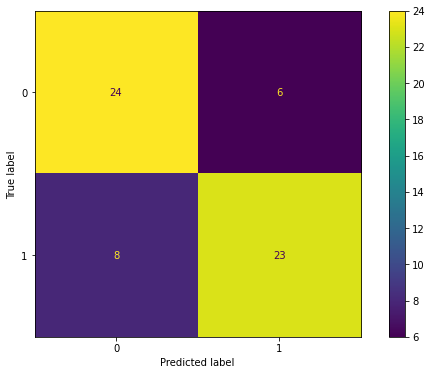

In [133]:
plot_confusion_matrix(knn, X_test_scaled, y_test);


In [134]:
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

[[24  6]
 [ 8 23]]
              precision    recall  f1-score   support

           0       0.75      0.80      0.77        30
           1       0.79      0.74      0.77        31

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61



In [135]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score


In [137]:
test_error_rates = []

for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scaled,y_train) 
   
    y_test_pred = knn_model.predict(X_test_scaled)
    
    test_error = 1 - accuracy_score(y_test,y_test_pred)
    test_error_rates.append(test_error)
    print("k=", k, "için error:", test_error)


k= 1 için error: 0.2786885245901639
k= 2 için error: 0.21311475409836067
k= 3 için error: 0.19672131147540983
k= 4 için error: 0.2295081967213115
k= 5 için error: 0.180327868852459
k= 6 için error: 0.2295081967213115
k= 7 için error: 0.180327868852459
k= 8 için error: 0.180327868852459
k= 9 için error: 0.180327868852459
k= 10 için error: 0.180327868852459
k= 11 için error: 0.21311475409836067
k= 12 için error: 0.19672131147540983
k= 13 için error: 0.2295081967213115
k= 14 için error: 0.21311475409836067
k= 15 için error: 0.21311475409836067
k= 16 için error: 0.19672131147540983
k= 17 için error: 0.21311475409836067
k= 18 için error: 0.21311475409836067
k= 19 için error: 0.19672131147540983
k= 20 için error: 0.21311475409836067
k= 21 için error: 0.21311475409836067
k= 22 için error: 0.19672131147540983
k= 23 için error: 0.16393442622950816
k= 24 için error: 0.16393442622950816
k= 25 için error: 0.16393442622950816
k= 26 için error: 0.16393442622950816
k= 27 için error: 0.163934426229508

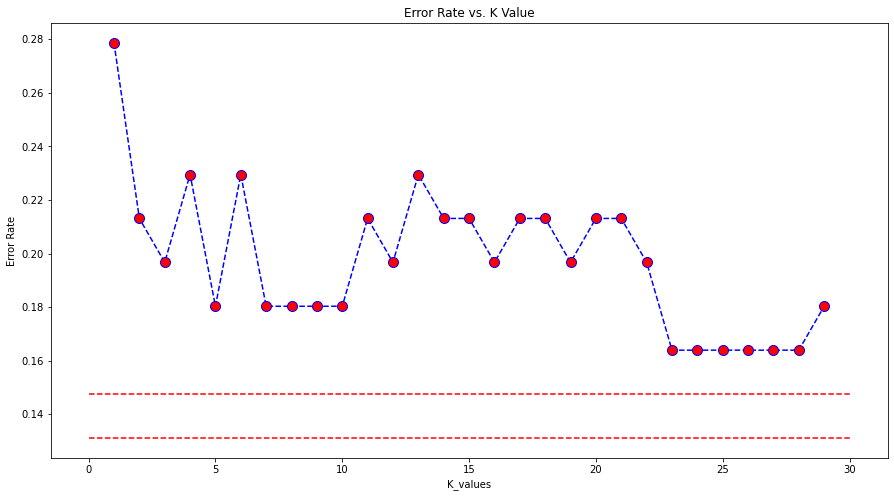

In [202]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.1311, xmin = 0, xmax = 30, colors= 'r', linestyles="--")
plt.hlines(y=0.1475, xmin = 0, xmax = 30, colors= 'r', linestyles="--")

In [145]:
min = np.amin(test_error_rates)
min_k_value = np.argmin(test_error_rates)+1
print('min error rate',min)
print('k value of min error rate',min_k_value)


min error rate 0.16393442622950816
k value of min error rate 23


In [146]:
knn = KNeighborsClassifier(n_neighbors=min_k_value)

knn.fit(X_train_scaled,y_train)
pred = knn.predict(X_test_scaled)

print('K=',min_k_value)
print('\n')
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

K= 23


[[23  7]
 [ 3 28]]


              precision    recall  f1-score   support

           0       0.88      0.77      0.82        30
           1       0.80      0.90      0.85        31

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



In [155]:
from sklearn.model_selection import GridSearchCV
knn_grid = KNeighborsClassifier()
k_values= range(1,30)


In [156]:
param_grid = {"n_neighbors":k_values, "p": [1,2], "weights": ['uniform', "distance"]}
knn_grid_model = GridSearchCV(knn_grid, param_grid, cv=10, scoring= 'accuracy')


In [157]:
knn_grid_model.fit(X_train_scaled, y_train)


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 30), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [158]:
k_best = GridSearchCV(knn, {"n_neighbors": np.arange(1,30,1)}, cv = 10).\
                      fit(X_train, y_train).best_params_["n_neighbors"]
    
knn_tuned = KNeighborsRegressor(n_neighbors = k_best).fit(X_train, y_train)
print(k_best)

24


In [159]:
knn_grid_model.best_params_


{'n_neighbors': 16, 'p': 1, 'weights': 'uniform'}

# Visually compare models based on your chosen metric

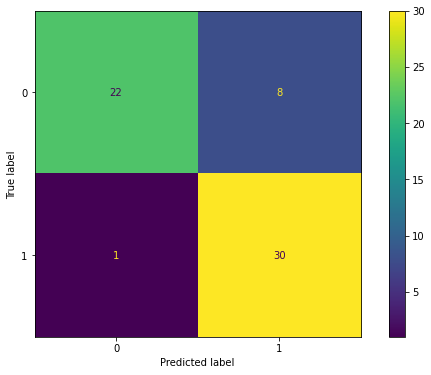

In [160]:
plot_confusion_matrix(log_model, X_test_scaled, y_test);


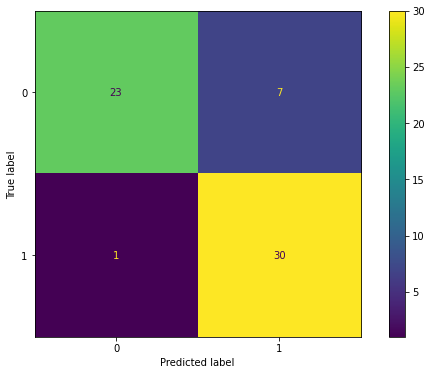

In [161]:
plot_confusion_matrix(grid_model, X_test_scaled, y_test);


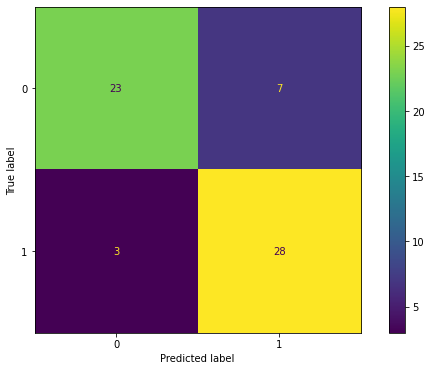

In [162]:
plot_confusion_matrix(knn, X_test_scaled, y_test);


# Chose best model and make a random prediction 

In [163]:
scaler = MinMaxScaler().fit(X)


In [201]:
final_model = knn.fit(X_scaled, y)
final_model

In [166]:
X.describe().T


,count,mean,std,min,25%,50%,75%,max
age,302.0000,54.4205,9.0480,29.0000,48.0000,55.5000,61.0000,77.0000
sex,302.0000,0.6821,0.4664,0.0000,0.0000,1.0000,1.0000,1.0000
cp,302.0000,0.9636,1.0320,0.0000,0.0000,1.0000,2.0000,3.0000
trestbps,302.0000,131.6026,17.5634,94.0000,120.0000,130.0000,140.0000,200.0000
chol,302.0000,246.5000,51.7535,126.0000,211.0000,240.5000,274.7500,564.0000
fbs,302.0000,0.1490,0.3567,0.0000,0.0000,0.0000,0.0000,1.0000
restecg,302.0000,0.5265,0.5260,0.0000,0.0000,1.0000,1.0000,2.0000
thalach,302.0000,149.5695,22.9035,71.0000,133.2500,152.5000,166.0000,202.0000
exang,302.0000,0.3278,0.4702,0.0000,0.0000,0.0000,1.0000,1.0000
oldpeak,302.0000,1.0430,1.1615,0.0000,0.0000,0.8000,1.6000,6.2000


In [204]:
import pickle
pickle.dump(scaler, open("scaler_target", 'wb'))

In [205]:
pickle.dump(final_model, open("final_model_target", 'wb'))


In [210]:
dict = {"age": [20,30,40,50,60],
           "sex":[0,1,1,1,0],
           "cp":[1,3,0,3,2],
           "trestbps": [110,90,100,80,110],
           "chol": [200,210,220,220,240],
           "fbs": [1,1,0,1,0],
           "restecg": [1,0,1,0,0],
           "thalach": [150,160,140,180,190],
           "exang": [0,1,0,1,1],
           "oldpeak": [0.90,1.20,2.30,1.90,1.50],
           "slope": [1,2,0,2,1],
           "ca": [1,3,0,4,2],
           "thal": [1,3,3,2,1]
          }

In [211]:
result = pd.DataFrame(dict)
result

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,20,0,1,110,200,1,1,150,0,0.9000,1,1,1
1,30,1,3,90,210,1,0,160,1,1.2000,2,3,3
2,40,1,0,100,220,0,1,140,0,2.3000,0,0,3
3,50,1,3,80,220,1,0,180,1,1.9000,2,4,2
4,60,0,2,110,240,0,0,190,1,1.5000,1,2,1


In [212]:
scaler_target = pickle.load(open("scaler_target", "rb"))


In [213]:
result_scaled = scaler_target.transform(result)
result_scaled

array([[-0.1875    ,  0.        ,  0.33333333,  0.1509434 ,  0.16894977,
         1.        ,  0.5       ,  0.60305344,  0.        ,  0.14516129,
         0.5       ,  0.25      ,  0.33333333],
       [ 0.02083333,  1.        ,  1.        , -0.03773585,  0.19178082,
         1.        ,  0.        ,  0.67938931,  1.        ,  0.19354839,
         1.        ,  0.75      ,  1.        ],
       [ 0.22916667,  1.        ,  0.        ,  0.05660377,  0.21461187,
         0.        ,  0.5       ,  0.52671756,  0.        ,  0.37096774,
         0.        ,  0.        ,  1.        ],
       [ 0.4375    ,  1.        ,  1.        , -0.13207547,  0.21461187,
         1.        ,  0.        ,  0.83206107,  1.        ,  0.30645161,
         1.        ,  1.        ,  0.66666667],
       [ 0.64583333,  0.        ,  0.66666667,  0.1509434 ,  0.26027397,
         0.        ,  0.        ,  0.90839695,  1.        ,  0.24193548,
         0.5       ,  0.5       ,  0.33333333]])

In [214]:
final_model = pickle.load(open("final_model_target", "rb"))


In [215]:
predictions = final_model.predict(result_scaled)
predictions_proba = final_model.predict_proba(result_scaled)
predictions2 = [1 if i >= optimal_threshold else 0 for i in predictions_proba[:,1]]

In [216]:
result["pred_proba"] = predictions_proba[:,1]
result["pred"] = predictions
result["pred2"] = predictions2
result

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,pred_proba,pred,pred2
0,20,0,1,110,200,1,1,150,0,0.9000,1,1,1,0.9130,1,1
1,30,1,3,90,210,1,0,160,1,1.2000,2,3,3,0.6087,1,1
2,40,1,0,100,220,0,1,140,0,2.3000,0,0,3,0.4348,0,0
3,50,1,3,80,220,1,0,180,1,1.9000,2,4,2,0.5652,1,0
4,60,0,2,110,240,0,0,190,1,1.5000,1,2,1,0.6522,1,1
